**Final Prediction at the End**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [2]:
Kansas_data = pd.read_csv('Kansas.csv')

In [3]:
Phila_data = pd.read_csv('Philadelphia.csv')

In [4]:
# Clean & Split Kansas Data

In [5]:
ks_data = Kansas_data
ks_data = ks_data.fillna(0)
ks_model_data = ks_data[['Tm_Score', 'O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO', 'D_1stD', 'D_TotYd',
                         'D_PassY', 'D_RushY', 'D_TO']]

In [6]:
season_stats = ['O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO','D_1stD', 'D_TotYd','D_PassY', 'D_RushY', 'D_TO']

In [7]:
ks_model_data[season_stats] = ks_model_data[season_stats] * 17

<ipython-input-7-44073cdc608b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_model_data[season_stats] = ks_model_data[season_stats] * 17


In [8]:
X = ks_model_data.drop('Tm_Score', axis=1)
y = ks_model_data['Tm_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
# Clean & Split Philadelphia Data

In [10]:
phi_data = Phila_data
phi_data = phi_data.fillna(0)
phi_model_data = phi_data[['Tm_Score', 'O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO','D_1stD', 'D_TotYd',
                           'D_PassY', 'D_RushY', 'D_TO']]

In [11]:
phi_model_data[season_stats] = phi_model_data[season_stats] * 17

<ipython-input-11-062149845cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_model_data[season_stats] = phi_model_data[season_stats] * 17


In [12]:
X1 = phi_model_data.drop('Tm_Score', axis=1)
y1 = phi_model_data['Tm_Score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

In [13]:
# Prediction Set

In [14]:
kansas_test1 = pd.DataFrame(ks_model_data[0:17].mean(axis = 0))
kansas_test2 = pd.DataFrame(ks_model_data[0:17].median(axis = 0))

In [15]:
frame = [kansas_test1,kansas_test2]
kansas_test = pd.concat(frame, axis = 1)

In [16]:
kansas_test = kansas_test.mean(axis=1)

In [17]:
kansas = kansas_test.drop('Tm_Score')

In [18]:
kansas = kansas.to_frame()

In [19]:
kansas= kansas.transpose()

In [20]:
# Predict Super Bowl Score
phila_test1 = pd.DataFrame(phi_model_data[0:17].mean(axis = 0))
phila_test2 = pd.DataFrame(phi_model_data[0:17].median(axis = 0))
frame1 = [phila_test1,phila_test2]
phila_test = pd.concat(frame1, axis = 1)
phila_test = phila_test.mean(axis=1)
phila = phila_test.drop('Tm_Score')
phila = phila.to_frame()
phila = phila.transpose()

In [21]:
# Kansas Random Forest

In [22]:
rf = RandomForestRegressor(n_estimators = 3000, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3000, random_state=0)

In [23]:
rf.score(X_test, y_test)

0.237311593776107

In [24]:
rf_pred = rf.predict(X_test)

In [25]:
mean_squared_error(y_test, rf_pred)

48.69002785333333

In [26]:
mean_absolute_error(y_test, rf_pred)

5.43612

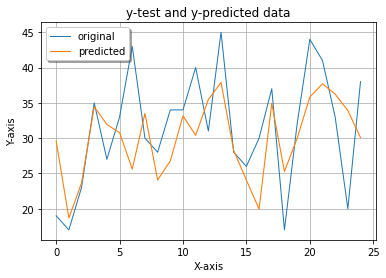

In [27]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rf_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [28]:
rf.predict(kansas)

array([27.56566667])

In [29]:
# Philadelphia Random Forest

In [30]:
rf1 = RandomForestRegressor(n_estimators = 3000, random_state = 0)
rf1.fit(X1_train, y1_train)

RandomForestRegressor(n_estimators=3000, random_state=0)

In [31]:
rf1.score(X1_test, y1_test)

0.26706329355932557

In [32]:
rf1_pred = rf1.predict(X1_test)

In [33]:
mean_squared_error(y1_test, rf1_pred)

50.87636171555555

In [34]:
mean_absolute_error(y1_test, rf1_pred)

6.198693333333333

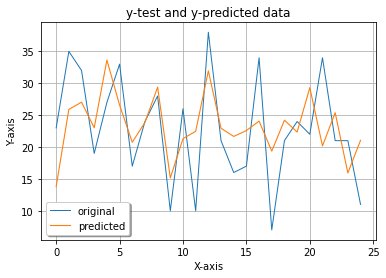

In [35]:
x_ax = range(len(y1_test))
plt.plot(x_ax, y1_test, linewidth=1, label="original")
plt.plot(x_ax, rf1_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [36]:
rf1.predict(phila)

array([24.4])

In [37]:
mse = mean_squared_error(y_test, rf_pred)
mape = mean_absolute_percentage_error(y_test, rf_pred)

In [38]:
mse1 = mean_squared_error(y1_test, rf1_pred)
mape1 = mean_absolute_percentage_error(y1_test, rf1_pred)

In [39]:
print("Prediction for Kansas: ", rf.predict(kansas))
print("R-squared: ", rf.score(X_test, y_test))
print("MSE: ", mse)
print("MAPE: ", mape)

Prediction for Kansas:  [27.56566667]
R-squared:  0.237311593776107
MSE:  48.69002785333333
MAPE:  0.18742317986464951


In [40]:
print("Prediction for Philadelphia: ", rf1.predict(phila))
print("R-squared: ", rf1.score(X1_test, y1_test))
print("MSE: ", mse1)
print("MAPE: ", mape1)

Prediction for Philadelphia:  [24.4]
R-squared:  0.26706329355932557
MSE:  50.87636171555555
MAPE:  0.360047452805221


In [41]:
# Kansas Neural Network

In [42]:
from sklearn.neural_network import MLPRegressor

In [43]:
mlp = MLPRegressor(max_iter = 5000, random_state = 0, solver = 'lbfgs', activation = 'identity', alpha = 1e-5)

In [44]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', alpha=1e-05, max_iter=5000, random_state=0,
             solver='lbfgs')

In [45]:
mlp_pred = mlp.predict(X_test)

In [46]:
mlp.score(X_test, y_test)

0.4767060832816641

In [47]:
mean_squared_error(y_test, mlp_pred)

33.40708364329856

In [48]:
mean_absolute_error(y_test, mlp_pred)

4.180773366987425

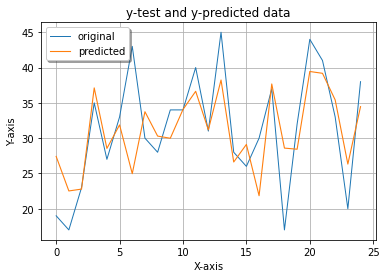

In [49]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, mlp_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [50]:
mlp.predict(kansas)

array([12.97842952])

In [51]:
# Philadelphia Neural Network

In [52]:
mlp1 = MLPRegressor(max_iter = 5000, random_state = 0, solver = 'lbfgs', activation = 'identity')

In [53]:
mlp1.fit(X1_train, y1_train)

MLPRegressor(activation='identity', max_iter=5000, random_state=0,
             solver='lbfgs')

In [54]:
mlp1_pred = mlp1.predict(X1_test)

In [55]:
mlp1.score(X1_test, y1_test)

0.5170005583354331

In [56]:
mean_squared_error(y1_test, mlp1_pred)

33.52711644348091

In [57]:
mean_absolute_error(y1_test, mlp1_pred)

4.188209361442591

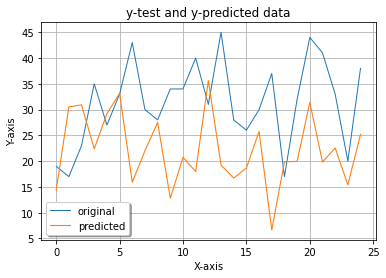

In [58]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, mlp1_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [59]:
mlp1.predict(phila)

array([84.27310425])

In [60]:
print("Prediction for Kansas: ", mlp.predict(kansas))
print("R-squared: ", mlp.score(X_test, y_test))

Prediction for Kansas:  [12.97842952]
R-squared:  0.4767060832816641


In [61]:
print("Prediction for Philadelphia: ", mlp1.predict(phila))
print("R-squared: ", mlp1.score(X1_test, y1_test))

Prediction for Philadelphia:  [84.27310425]
R-squared:  0.5170005583354331


In [ ]:
# Kansas Neural Network Standardlized

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

In [71]:
X1_trainscaled = sc_X.fit_transform(X1_train)
X1_testscaled = sc_X.transform(X1_test)

In [65]:
mlp2 = MLPRegressor(max_iter = 5000, random_state = 0, solver = 'lbfgs', activation = 'identity')
mlp2.fit(X_trainscaled, y_train)

MLPRegressor(activation='identity', max_iter=5000, random_state=0,
             solver='lbfgs')

In [66]:
mlp2_pred = mlp2.predict(X_testscaled)

In [67]:
mlp2.score(X_testscaled, y_test)

0.4870549549111999

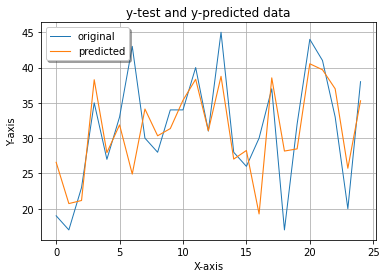

In [70]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, mlp2_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [68]:
kansas_scaled = sc_X.transform(kansas)

In [69]:
mlp2.predict(kansas_scaled)

array([29.01860138])

In [ ]:
# Philadelphia Neural Network Standardlized

In [72]:
mlp3 = MLPRegressor(max_iter = 5000, random_state = 0, solver = 'lbfgs', activation = 'identity')
mlp3.fit(X1_trainscaled, y1_train)

MLPRegressor(activation='identity', max_iter=5000, random_state=0,
             solver='lbfgs')

In [73]:
mlp3_pred = mlp3.predict(X1_testscaled)

In [74]:
mlp3.score(X1_testscaled, y1_test)

0.4307147061372678

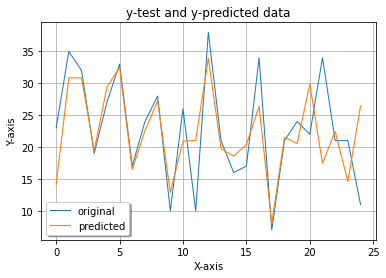

In [75]:
x_ax = range(len(y1_test))
plt.plot(x_ax, y1_test, linewidth=1, label="original")
plt.plot(x_ax, mlp3_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [76]:
phila_scaled = sc_X.transform(phila)

In [77]:
mlp3.predict(phila_scaled)

array([27.33256212])

In [80]:
print("Prediction for Kansas: ", mlp2.predict(kansas_scaled))
print("R-squared: ", mlp2.score(X_testscaled, y_test))
print("MSE: ", mean_squared_error(y_test, mlp2_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, mlp2_pred))

Prediction for Kansas:  [29.01860138]
R-squared:  0.4870549549111999
MSE:  32.746411678469
MAPE:  0.14716599799121732


In [81]:
print("Prediction for Philadelphia: ", mlp3.predict(phila_scaled))
print("R-squared: ", mlp3.score(X1_testscaled, y1_test))
print("MSE: ", mean_squared_error(y1_test, mlp3_pred))
print("MAPE: ", mean_absolute_percentage_error(y1_test, mlp3_pred))

Prediction for Philadelphia:  [27.33256212]
R-squared:  0.4307147061372678
MSE:  39.516597102305234
MAPE:  0.2422498672209602


In [ ]:
# Kansas GB

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gb = GradientBoostingRegressor(n_estimators = 2000, random_state = 0)

In [85]:
gb.fit(X_trainscaled, y_train)

GradientBoostingRegressor(n_estimators=2000, random_state=0)

In [86]:
gb_pred = gb.predict(X_testscaled)

In [87]:
gb.score(X_testscaled, y_test)

0.3613953070954068

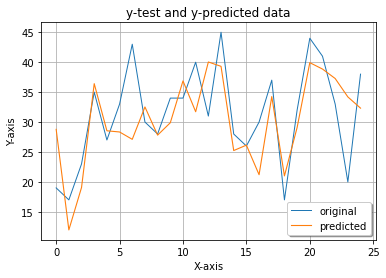

In [88]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, gb_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [89]:
gb.predict(kansas_scaled)

array([27.53006262])

In [90]:
# Philadelphia GB

In [91]:
gb1 = GradientBoostingRegressor(n_estimators = 2000, random_state = 0)

In [92]:
gb1.fit(X1_trainscaled, y1_train)

GradientBoostingRegressor(n_estimators=2000, random_state=0)

In [93]:
gb1_pred = gb1.predict(X1_testscaled)

In [94]:
gb1.score(X1_testscaled, y1_test)

0.23941197918136992

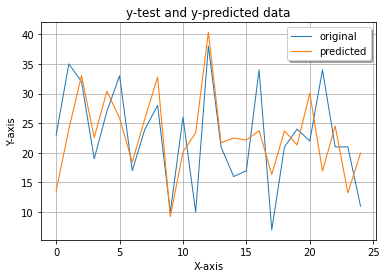

In [95]:
x_ax = range(len(y1_test))
plt.plot(x_ax, y1_test, linewidth=1, label="original")
plt.plot(x_ax, gb1_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [96]:
gb1.predict(phila_scaled)

array([26.69206324])

In [97]:
print("Prediction for Kansas: ", gb.predict(kansas_scaled))
print("R-squared: ", gb.score(X_testscaled, y_test))
print("MSE: ", mean_squared_error(y_test, gb_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, gb_pred))

Prediction for Kansas:  [27.53006262]
R-squared:  0.3613953070954068
MSE:  40.76852359502923
MAPE:  0.1776817107400922


In [98]:
print("Prediction for Philadelphia: ", gb1.predict(phila_scaled))
print("R-squared: ", gb1.score(X1_testscaled, y1_test))
print("MSE: ", mean_squared_error(y1_test, gb1_pred))
print("MAPE: ", mean_absolute_percentage_error(y1_test, gb1_pred))

Prediction for Philadelphia:  [26.69206324]
R-squared:  0.23941197918136992
MSE:  52.79576111231271
MAPE:  0.32625588186914023


Using Data from 2018-2022:\
Using Random Forest Regressor:\
    Prediction for Kansas: 28\
        R-squared:  0.24\
        MSE:  48.69\
        MAPE:  0.19\
    Prediction for Philadelphia: 24\
        R-squared:  0.28\
        MSE:  50.88\
        MAPE:  0.36\
        \
Using Neural Network:\
    Prediction for Kansas: 29\
        R-squared:  0.49\
        MSE:  32.75\
        MAPE:  0.15\
    Prediction for Philadelphia: 27\
        R-squared:  0.43\
        MSE:  39.52\
        MAPE:  0.24\
        \
Using Gradient Boosting:\
    Prediction for Kansas: 28\
        R-squared:  0.36\
        MSE:  40.77\
        MAPE:  0.18\
    Prediction for Philadelphia: 27\
        R-squared:  0.24\
        MSE:  52.8\
        MAPE:  0.33\
\
Using 2022 Data:\
Prediction for Kansas: 28\
Prediction for Philadelphia: 38\
\
Data from 2022 shows that Eagles are performing better this season, and previous data shows that the score between two teams would be close.\
As a result, Chiefs: 28, and Eagles: 29 would be my prediction.